# Introduction to Probabilistic Graphical Models
## Practical Session 2
### Author: Xiang Yu, Email: shawnxiangyu@yahoo.com

In [2]:
%matplotlib inline
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
import networkx as nx
import pyparsing
from IPython.display import Math
import copy

## we first run the code with the warning enabled, if no error of relevant warning is to be found, 
## we disable the warning then
# import warnings
# warnings.filterwarnings("ignore")

In [60]:
# choose a large font size by default and use tex for math
fontsize = 18
params = {'axes.labelsize': fontsize + 2,
      'font.size': fontsize + 2,
      'legend.fontsize': fontsize + 2,
      'xtick.labelsize': fontsize,
      'ytick.labelsize': fontsize,
      'text.usetex': True}
plt.rcParams.update(params)

#### Question 1

We need to compute    
$$
\large \gamma_i(x) = \frac{\pi_i \mathcal{N}(x;\mu_i, \Sigma_i)}{ \sum_{j=1}^K \pi_j \mathcal{N}(x;\mu_j, \Sigma_j)}
$$
We could take log on both side, then 
$$
\large \log\gamma_i(x) = \log(\pi_i \mathcal{N}(x;\mu_i, \Sigma_i)) - \log(\sum_{j=1}^K \pi_j \mathcal{N}(x;\mu_j, \Sigma_j))
$$

where $\log(\sum\pi_j\mathcal{N_j})$ could be calculated with the stable method in the Practical Session 1.I.e. 





\begin{align}
\large \log(\sum\pi_j\mathcal{N_j}) 
 &= \large log\sum_{i=1}^I \pi_j \kappa_j\exp(v_j) \\
 & = \large \log\sum_{j=1}^I \pi_j\kappa_j \exp(v_j- V_{max} + V_{max}) \\
  & = \large \log\sum_{j=1}^I \pi_j\kappa_j\exp(v_j- V_{max}) \exp(V_{max}) \\
 & = \large V_{max} + \log\sum_{j=1}^I \pi_j\kappa_j\exp(v_j- V_{max})
\end{align}

Where 
$$ \large \mathcal{N_j} = \mathcal{N}(x;\mu_j, \Sigma_j)= \frac{1}{\sqrt{2\pi}\Sigma_j} \exp{-\frac{(x-\mu_j)^2}{2\Sigma_j^2}} $$
and 

\begin{align}
f_{\mathbf X}(x_1,\ldots,x_k)
& = \frac{\exp\left(-\frac 1 2 ({\mathbf x}-{\boldsymbol\mu})^\mathrm{T}{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})\right)}{\sqrt{(2\pi)^k|\boldsymbol\Sigma|}}
\end{align}


$$ \large v_j = \exp({-\frac{(x-\mu_j)^2}{2\Sigma_j^2}}), \kappa_j = \sqrt{2\pi}\Sigma_j, V_{max} = \max_{j} v_j$$

In [3]:
# to be updated
def stable_logsumexp(xs): 
    max_xs = np.max(xs)
    nr_xs = len(xs)
    vi_vmax = xs - max_xs   
    return max_xs + np.log(np.sum(np.exp(vi_vmax)))


#### Question 2

In [5]:
# to be typed, see the lecture notes

def log_sum_N (K, U, Sigma, x):
    
    vj = np.exp((x - uj)**2 / (2)
                
    multivariate_normal.pdf(x, mean, cov)            
    


def cal_gamma(K, us, sigmas, xi):
    
    gamma_xk = np.zeros((K,1))
    
    for i in np.arange(K): 
        



#### Question 3

In [27]:
# hyper-parameters

K = 3
pi = np.array([0.3, 0.2, 0.5])
us = np.array([[0, 0], [1, 2], [2,0]])

# sg1 = np.array([[1, -0.25], [-0.25, 0.5]])
# sg2 = np.array([[0.5, 0.25],[0.25, 0.5]])
# sg3 = np.array([[0.5, -0.25],[-0.25, 1]])
# sigmas = [sg1, sg2, sg3]
sgs = np.array([[[1, -0.25], [-0.25, 0.5]], [[0.5, 0.25],[0.25, 0.5]], [[0.5, -0.25],[-0.25, 1]]])

In [29]:
def sample_loc (prob, pi_distrbution):    
    # return the idx loction of prob in the prob_distrbution
    nr_loc = len(pi_distrbution)
    cum_sum = np.cumsum(pi_distrbution)  
    idx = np.where(prob < cum_sum)[0]  
    return idx[0]

In [39]:

N = 1000  # number of samples

xs = np.zeros((N, 3))
# simulator the trajectory 
for i in np.arange(0,N):   
    
    si_pi = np.random.uniform(0,1)
    gs_id = sample_loc(si_pi, pi)   
    ui = us[gs_id]
    sgi = sgs[gs_id]   
    xs[i,[0,1]] = np.random.multivariate_normal(ui, sgi)
    xs[i,2] = gs_id


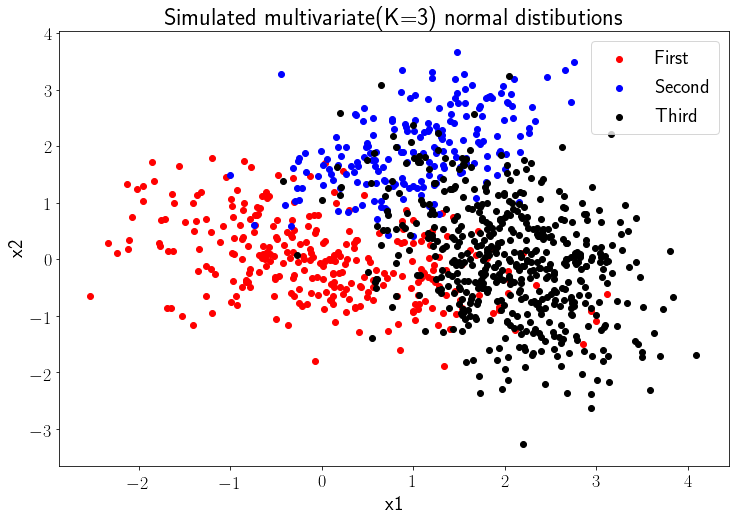

In [61]:
x_g1 = xs[xs[:,2] == 0][:,[0,1]]
x_g2 = xs[xs[:,2] == 1][:,[0,1]]
x_g3 = xs[xs[:,2] == 2][:,[0,1]]

plt.figure(figsize=(12, 8))
plt.scatter(x_g1[:,0], x_g1[:,1], c='r', label='First') 
plt.scatter(x_g2[:,0], x_g2[:,1], c='b', label='Second')
plt.scatter(x_g3[:,0], x_g3[:,1], c='k', label='Third') 
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Simulated multivariate(K=3) normal distibutions ')
plt.show() 

#### 2. Implement the EM algorithm for GMMs

In [79]:
xs_nl = xs[:,:2]  # not labeled data

xs_mean = np.mean(xs_nl, axis=0)
xs_cov = np.cov(xs_nl.T)

# initilize the parameters
pi_para = np.ones((3,1)) / K
us_para = np.array([xs_mean, xs_mean, xs_mean])
sgs = np.array([xs_cov, xs_cov, xs_cov])
